In [209]:
pip install PyMySQL

Note: you may need to restart the kernel to use updated packages.


In [210]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
from sklearn import linear_model

In [211]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [212]:
df = pd.read_sql('SELECT * FROM credit', con=connection)

In [213]:
df. to_csv ( 'BancoUno.csv' , header = False , index = False )

In [214]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default


In [215]:
credit = df

In [216]:
credit.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'], dtype=object)

In [217]:
cols = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4",
       "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
       "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "default_payment"]

credit = pd.read_csv("BancoUno.csv", names = cols)

In [218]:
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default


In [219]:
credit=credit.drop(0)
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
10,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [220]:
credit= credit.drop_duplicates()
credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,20000,female,high school,2,49,0,0,2,0,-1,...,10400,1150,0,3008,0,600,1150,0,0,not default
2395,130000,female,university,2,24,1,-2,-1,-1,-1,...,-3,998,937,0,3372,0,1001,939,1013,not default
2396,110000,female,high school,1,27,0,0,0,0,0,...,47316,47175,47141,2326,3000,1807,1698,1911,1808,not default
2397,200000,male,university,1,29,0,0,0,2,2,...,48367,49366,47539,2078,3900,1900,1904,12,5224,not default


In [221]:
credit.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
2394    False
2395    False
2396    False
2397    False
2398    False
Length: 2397, dtype: bool

In [222]:
credit.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
2394,20000,female,high school,2,49,0,0,2,0,-1,...,10400,1150,0,3008,0,600,1150,0,0,not default
2395,130000,female,university,2,24,1,-2,-1,-1,-1,...,-3,998,937,0,3372,0,1001,939,1013,not default
2396,110000,female,high school,1,27,0,0,0,0,0,...,47316,47175,47141,2326,3000,1807,1698,1911,1808,not default
2397,200000,male,university,1,29,0,0,0,2,2,...,48367,49366,47539,2078,3900,1900,1904,12,5224,not default
2398,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [223]:
credit.shape

(2397, 24)

In [224]:
import pandas_profiling

In [225]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [226]:
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
10,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [227]:
credit.isnull().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64

In [228]:
credit.dtypes

LIMIT_BAL          object
SEX                object
EDUCATION          object
MARRIAGE           object
AGE                object
PAY_0              object
PAY_2              object
PAY_3              object
PAY_4              object
PAY_5              object
PAY_6              object
BILL_AMT1          object
BILL_AMT2          object
BILL_AMT3          object
BILL_AMT4          object
BILL_AMT5          object
BILL_AMT6          object
PAY_AMT1           object
PAY_AMT2           object
PAY_AMT3           object
PAY_AMT4           object
PAY_AMT5           object
PAY_AMT6           object
default_payment    object
dtype: object

In [229]:
credit[credit["LIMIT_BAL"].str.contains("LIMIT_BAL")]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
2398,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [230]:
credit=credit.drop(2398)

In [231]:
credit[credit["LIMIT_BAL"].str.contains("LIMIT_BAL")]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment


In [232]:
valoresPerdidos=credit.isnull()
valoresPerdidos.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [233]:
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")

LIMIT_BAL
False    2396
Name: LIMIT_BAL, dtype: int64

SEX
False    2396
Name: SEX, dtype: int64

EDUCATION
False    2396
Name: EDUCATION, dtype: int64

MARRIAGE
False    2396
Name: MARRIAGE, dtype: int64

AGE
False    2396
Name: AGE, dtype: int64

PAY_0
False    2396
Name: PAY_0, dtype: int64

PAY_2
False    2396
Name: PAY_2, dtype: int64

PAY_3
False    2396
Name: PAY_3, dtype: int64

PAY_4
False    2396
Name: PAY_4, dtype: int64

PAY_5
False    2396
Name: PAY_5, dtype: int64

PAY_6
False    2396
Name: PAY_6, dtype: int64

BILL_AMT1
False    2396
Name: BILL_AMT1, dtype: int64

BILL_AMT2
False    2396
Name: BILL_AMT2, dtype: int64

BILL_AMT3
False    2396
Name: BILL_AMT3, dtype: int64

BILL_AMT4
False    2396
Name: BILL_AMT4, dtype: int64

BILL_AMT5
False    2396
Name: BILL_AMT5, dtype: int64

BILL_AMT6
False    2396
Name: BILL_AMT6, dtype: int64

PAY_AMT1
False    2396
Name: PAY_AMT1, dtype: int64

PAY_AMT2
False    2396
Name: PAY_AMT2, dtype: int64

PAY_AMT3
False    2396
Name: PAY_

In [234]:
credit[["LIMIT_BAL"]] = credit[["LIMIT_BAL"]].astype("float")
credit[["AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]] = credit[["AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].astype("int32")
credit[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]] = credit[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].astype("int32")
credit[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]] = credit[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].astype("int32")

In [235]:
credit.dtypes

LIMIT_BAL          float64
SEX                 object
EDUCATION           object
MARRIAGE            object
AGE                  int32
PAY_0                int32
PAY_2                int32
PAY_3                int32
PAY_4                int32
PAY_5                int32
PAY_6                int32
BILL_AMT1            int32
BILL_AMT2            int32
BILL_AMT3            int32
BILL_AMT4            int32
BILL_AMT5            int32
BILL_AMT6            int32
PAY_AMT1             int32
PAY_AMT2             int32
PAY_AMT3             int32
PAY_AMT4             int32
PAY_AMT5             int32
PAY_AMT6             int32
default_payment     object
dtype: object

In [236]:
credit = pd.get_dummies(credit)

In [237]:
credit.dtypes

LIMIT_BAL                      float64
AGE                              int32
PAY_0                            int32
PAY_2                            int32
PAY_3                            int32
PAY_4                            int32
PAY_5                            int32
PAY_6                            int32
BILL_AMT1                        int32
BILL_AMT2                        int32
BILL_AMT3                        int32
BILL_AMT4                        int32
BILL_AMT5                        int32
BILL_AMT6                        int32
PAY_AMT1                         int32
PAY_AMT2                         int32
PAY_AMT3                         int32
PAY_AMT4                         int32
PAY_AMT5                         int32
PAY_AMT6                         int32
SEX_female                       uint8
SEX_male                         uint8
EDUCATION_graduate school        uint8
EDUCATION_high school            uint8
EDUCATION_other                  uint8
EDUCATION_university     

In [238]:
credit.columns.values

array(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university', 'MARRIAGE_0',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'default_payment_default', 'default_payment_not default'],
      dtype=object)

In [239]:
credit.head(10)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default_payment_default,default_payment_not default
1,20000.0,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,1,0,0,1,0
2,120000.0,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,1,0,0,1,0,1,0
3,90000.0,34,0,0,0,0,0,0,29239,14027,...,0,0,0,1,0,0,1,0,0,1
4,50000.0,37,0,0,0,0,0,0,46990,48233,...,0,0,0,1,0,1,0,0,0,1
5,50000.0,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,1,0,1,0,0,0,1
6,50000.0,37,0,0,0,0,0,0,64400,57069,...,1,0,0,0,0,0,1,0,0,1
7,500000.0,29,0,0,0,0,0,0,367965,412023,...,1,0,0,0,0,0,1,0,0,1
8,100000.0,23,0,-1,-1,0,0,-1,11876,380,...,0,0,0,1,0,0,1,0,0,1
9,140000.0,28,0,0,2,0,0,0,11285,14096,...,0,1,0,0,0,1,0,0,0,1
10,20000.0,35,-2,-2,-2,-2,-1,-1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [240]:
credit.corr()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default_payment_default,default_payment_not default
LIMIT_BAL,1.000000,0.154974,-0.200540,-0.248233,-0.236194,-0.224340,-0.213442,-0.210881,0.361823,0.361342,...,0.228848,-0.145685,0.004666,-0.115704,0.000322,0.137824,-0.118322,-0.080838,-0.084348,0.084348
AGE,0.154974,1.000000,-0.017835,-0.029903,-0.037790,-0.024571,-0.012634,-0.009462,0.068263,0.061591,...,-0.105091,0.252673,0.008921,-0.086934,0.050792,0.461804,-0.490679,0.109566,0.039677,-0.039677
PAY_0,-0.200540,-0.017835,1.000000,0.637668,0.547805,0.497509,0.472577,0.445626,0.171638,0.175226,...,-0.142563,0.055447,-0.004659,0.098640,-0.029943,-0.013301,0.008145,0.034587,0.288299,-0.288299
PAY_2,-0.248233,-0.029903,0.637668,1.000000,0.763806,0.667189,0.639244,0.606825,0.225230,0.229758,...,-0.196535,0.055588,-0.018184,0.153530,-0.021997,-0.029217,0.025394,0.025216,0.202049,-0.202049
PAY_3,-0.236194,-0.037790,0.547805,0.763806,1.000000,0.812452,0.724154,0.669614,0.195056,0.220140,...,-0.164077,0.064731,-0.032034,0.117473,-0.027376,-0.028387,0.023605,0.031624,0.206223,-0.206223
PAY_4,-0.224340,-0.024571,0.497509,0.667189,0.812452,1.000000,0.835864,0.742573,0.200938,0.221052,...,-0.155414,0.052448,-0.026775,0.117245,-0.024887,-0.035931,0.029556,0.037215,0.172565,-0.172565
PAY_5,-0.213442,-0.012634,0.472577,0.639244,0.724154,0.835864,1.000000,0.815941,0.214870,0.230721,...,-0.131661,0.053426,-0.022265,0.092564,-0.010415,-0.036748,0.029242,0.035817,0.187247,-0.187247
PAY_6,-0.210881,-0.009462,0.445626,0.606825,0.669614,0.742573,0.815941,1.000000,0.212613,0.229893,...,-0.139426,0.054042,-0.024223,0.100021,-0.023373,-0.033721,0.030735,0.022156,0.144420,-0.144420
BILL_AMT1,0.361823,0.068263,0.171638,0.225230,0.195056,0.200938,0.214870,0.212613,1.000000,0.953901,...,-0.010959,-0.014951,0.018191,0.018650,-0.021983,0.041216,-0.032683,-0.026224,0.000581,-0.000581
BILL_AMT2,0.361342,0.061591,0.175226,0.229758,0.220140,0.221052,0.230721,0.229893,0.953901,1.000000,...,-0.004935,-0.019785,0.023348,0.015474,-0.016538,0.036405,-0.027697,-0.029392,0.004263,-0.004263


In [241]:
credit.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default_payment_default,default_payment_not default
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,49107.924457,...,0.379382,0.163606,0.007513,0.449499,0.002504,0.428631,0.555092,0.013773,0.216611,0.783389
std,129493.683277,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,75503.044969,...,0.485335,0.369995,0.086367,0.497547,0.049989,0.494984,0.497059,0.116572,0.412021,0.412021
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-24704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,3033.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,20362.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,60846.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,983931.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
cdf = credit[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',                        
           'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3',
           'PAY_AMT4','PAY_AMT5','PAY_AMT6','EDUCATION_university']]
cdf.head(9)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_university
1,20000.0,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
2,120000.0,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000.0,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
4,50000.0,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
5,50000.0,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,1
6,50000.0,37,0,0,0,0,0,0,64400,57069,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000.0,29,0,0,0,0,0,0,367965,412023,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000.0,23,0,-1,-1,0,0,-1,11876,380,...,221,-159,567,380,601,0,581,1687,1542,1
9,140000.0,28,0,0,2,0,0,0,11285,14096,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [244]:
cdf['LIMIT_BAL'].value_counts()

50000.0      296
20000.0      160
30000.0      121
200000.0     115
80000.0      108
            ... 
670000.0       1
680000.0       1
430000.0       1
540000.0       1
1000000.0      1
Name: LIMIT_BAL, Length: 62, dtype: int64

In [245]:
cdf['EDUCATION_university'].value_counts()

0    1319
1    1077
Name: EDUCATION_university, dtype: int64

In [246]:
cdf.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_university
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,49107.924457,...,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631,0.449499
std,129493.683277,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,75503.044969,...,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470,0.497547
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-24704.000000,...,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,3033.500000,...,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,20362.000000,...,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000,0.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,60846.000000,...,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000,1.000000
max,1000000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000,1.000000


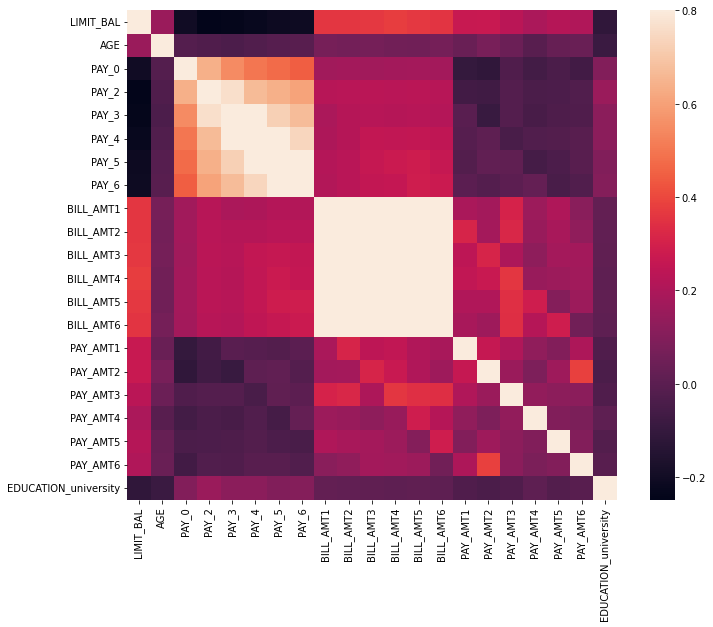

In [247]:
corrmat = cdf.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [248]:
cdf[["LIMIT_BAL","AGE"]].corr()

,LIMIT_BAL,AGE
LIMIT_BAL,1.000000,0.154974
AGE,0.154974,1.000000


In [249]:
cdf[["LIMIT_BAL","EDUCATION_university"]].corr()

,LIMIT_BAL,EDUCATION_university
LIMIT_BAL,1.000000,-0.115704
EDUCATION_university,-0.115704,1.000000


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_university
1,20000.0,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
2,120000.0,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000.0,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
4,50000.0,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
5,50000.0,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


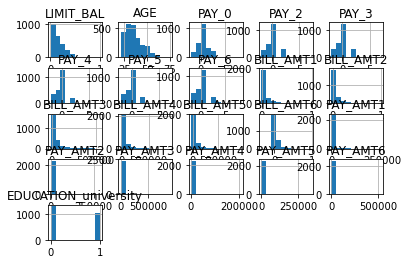

In [250]:
viz = cdf[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',                        
           'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3',
           'PAY_AMT4','PAY_AMT5','PAY_AMT6','EDUCATION_university']]
viz.hist()
cdf.head()                       

In [251]:
msk = np.random.rand(len(cdf)) < 0.8 #Esto selecciona aleatoriamente el 80% de las observaciones y la amacena en msk
train = cdf[msk] #aca se indica que el set de entrenamiento esta conformado por el 80% de las observaciones
test = cdf[~msk] #aca se especifica que el set de prueba esta conformado por el 20% de la data restante.

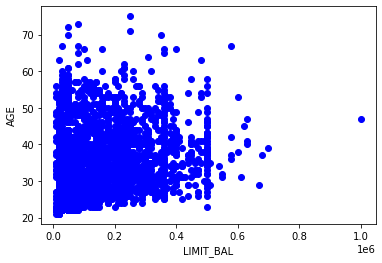

In [252]:
plt.scatter(cdf.LIMIT_BAL, cdf.AGE,  color='blue')
plt.xlabel("LIMIT_BAL")
plt.ylabel("AGE")
plt.show()

(0.0, 77.7)

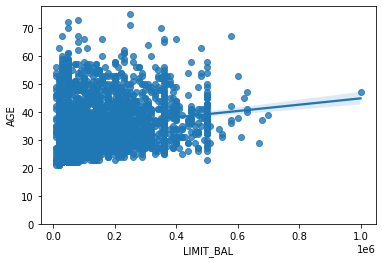

In [253]:
sns.regplot(x="LIMIT_BAL", y="AGE", data= cdf)
plt.ylim(0,)

In [254]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['LIMIT_BAL']])
y = np.asanyarray(train[['AGE']])
regr.fit(x,y)
# Obtener coeficientes de resultados, estos datos son informativos.
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.07383279e-05]]
Intercept:  [33.68453765]


In [255]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['LIMIT_BAL']])
test_y = np.asanyarray(test[['AGE']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 7.44
Residual sum of squares (MSE): 85.55
R2-score: 0.03


In [256]:
cdf = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': test_y_.flatten()})
cdf.head(10)

,Actual,Predicted
0,24,33.899304
1,23,34.758370
2,30,34.436221
3,23,34.221454
4,29,35.617437
5,33,37.550336
6,24,33.899304
7,29,37.979869
8,45,36.906036
9,22,34.006687


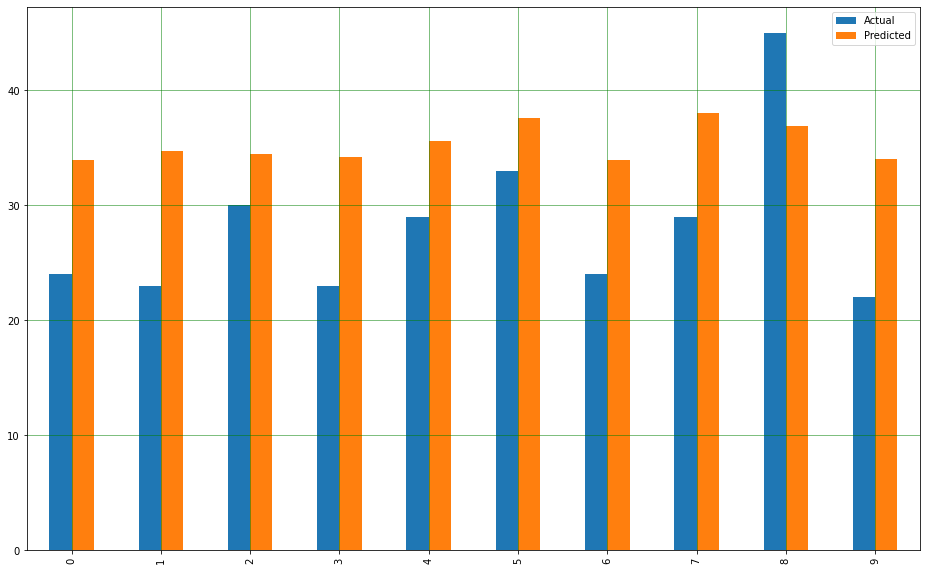

In [257]:
df1 = cdf.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [264]:
#imports
#numpy, pandas, scipy, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#model metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation

from sklearn.cross_validation import train_test_split

In [269]:
print(y)

[[26]
 [34]
 [37]
 ...
 [49]
 [24]
 [27]]
